# Wrangling and Analyze Data

Prepared by: Ashley Mahaffey

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [59]:
import pandas as pd
import numpy as np
import requests as r
import json as j
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install --upgrade tweepy

Note: you may need to restart the kernel to use updated packages.


In [3]:
twitter_archive = pd.read_csv('/Users/ashleymahaffey/Desktop/DA/twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]

response = requests.get(url)

if response.status_code == 200:
    # Write the content to a file
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f"File {file_name} downloaded successfully.")
else:
    print("Failed to download the file.")

File image-predictions.tsv downloaded successfully.


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


AttributeError: module 'tweepy' has no attribute 'TweepError'

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [7]:
df = pd.read_csv('image-predictions.tsv')
df.head()

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


In [8]:
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

Programmatic Assessment: Quality Issues

In [9]:
#1 Inconsistent Dog Names:
inconsistent_names = twitter_archive[twitter_archive['name'].notnull() & twitter_archive['name'].str.islower()]
inconsistent_names

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,NaN,NaN,NaN,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,NaN,NaN,NaN,NaN
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,NaN,NaN,NaN,NaN
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,NaN,NaN,NaN,NaN
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN


In [10]:
#2 Tweets with No Images:
tweets_without_images = twitter_archive[twitter_archive['expanded_urls'].isnull()]
tweets_without_images

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,NaN,NaN,NaN,NaN,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,NaN,NaN,NaN,NaN,NaN
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,NaN,NaN,NaN,NaN,NaN


In [11]:
#3. Inconsistent Stages:
inconsistent_stages = twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: x.value_counts().sum(), axis=1)
inconsistent_stages = twitter_archive[inconsistent_stages > 1]
inconsistent_stages

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,NaN,NaN,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,NaN,NaN
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,NaN,pupper,NaN
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,NaN,pupper,NaN
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,NaN,pupper,NaN
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN


In [12]:
#4. URL Validity:
twitter_archive.loc[:, 'expanded_urls'] = twitter_archive['expanded_urls'].replace(np.nan, '')

invalid_urls = twitter_archive[~twitter_archive['expanded_urls'].str.startswith('https://twitter.com')]

print(invalid_urls)

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
6     890971913173991426                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
...                  ...                    ...                  ...   
2038  671550332464455680           6.715449e+17         4.196984e+09   
2149  669684865554620416           6.693544e+17         4.196984e+09   
2189  668967877119254528           6.689207e+17         2.143566e+07   
2212  668587383441514497                    NaN                  NaN   
2298  667070482143944705           6.670655e+17         4.196984e+09   

                      timestamp  \
6     2017-07-28 16:27:12 +0000   
27    2017-07-16 23:58:41 +0000   
30    2017-07-15 16:51:35 +000

In [13]:
#5. Non-original Ratings:
non_original_ratings = twitter_archive[~twitter_archive['in_reply_to_status_id'].notna() & ~twitter_archive['text'].str.match("^RT @")]
print("Number of Non-Original Ratings:", len(non_original_ratings))

# Sample of Non-Original Ratings
print("Sample of Non-Original Ratings:")
print(non_original_ratings[['tweet_id', 'text', 'in_reply_to_status_id', 'retweeted_status_id']])

Number of Non-Original Ratings: 2097
Sample of Non-Original Ratings:
                tweet_id                                               text  \
0     892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1     892177421306343426  This is Tilly. She's just checking pup on you....   
2     891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3     891689557279858688  This is Darla. She commenced a snooze mid meal...   
4     891327558926688256  This is Franklin. He would like you to stop ca...   
...                  ...                                                ...   
2351  666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
2352  666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
2353  666033412701032449  Here is a very happy pup. Big fan of well-main...   
2354  666029285002620928  This is a western brown Mitsubishi terrier. Up...   
2355  666020888022790149  Here we have a Japanese Irish Setter

In [14]:
#6. URLs in the 'text' column match those in the 'expanded_urls' column:
mismatched_urls = twitter_archive[twitter_archive.apply(lambda row: str(row['tweet_id']) not in row['expanded_urls'], axis=1)]
print(mismatched_urls[['tweet_id', 'text', 'expanded_urls']])

                tweet_id                                               text  \
19    888202515573088257  RT @dog_rates: This is Canela. She attempted s...   
30    886267009285017600  @NonWhiteHat @MayhewMayhem omg hello tanner yo...   
32    886054160059072513  RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...   
35    885518971528720385  I have a new hero and his name is Howard. 14/1...   
36    885311592912609280  RT @dog_rates: This is Lilly. She just paralle...   
...                  ...                                                ...   
2189  668967877119254528                     12/10 good shit Bubka\n@wane15   
2212  668587383441514497  Never forget this vine. You will not stop watc...   
2259  667550904950915073  RT @dogratingrating: Exceptional talent. Origi...   
2260  667550882905632768  RT @dogratingrating: Unoriginal idea. Blatant ...   
2298  667070482143944705  After much debate this dog is being upgraded t...   

                                          expanded_

In [15]:
#7. Inconsistent Rating Scales:
inconsistent_ratings = twitter_archive[(twitter_archive['rating_denominator'] != 10) | (twitter_archive['rating_numerator'] > 20)]
print(inconsistent_ratings)

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
290   838150277551247360           8.381455e+17         2.195506e+07   
313   835246439529840640           8.352460e+17         2.625958e+07   
340   832215909146226688                    NaN                  NaN   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
695   786709082849828864                    NaN                  NaN   
763   778027034220126208                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
979   749981277374128128                    NaN                 

In [16]:
#8. Missing or incomplete data in critical columns:
missing_data = twitter_archive[twitter_archive[['name', 'rating_numerator', 'rating_denominator', 'expanded_urls']].isnull().any(axis=1)]
print(missing_data)

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
...                  ...                    ...                  ...   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2351  666049248165822465                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
5     2017-07-29 00:08:17 +0000   
7     2017-07-28 00:22:40 +0000   
12    2017-07-25 01:55:32 +000

Programmatic Assessment: Tidiness Issues

In [17]:
#1. Multiple Observations in One Row:
multiple_observations = twitter_archive[twitter_archive['text'].str.count('dog') > 1]
print(multiple_observations)

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
25    887101392804085760                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   
93    874057562936811520                    NaN                  NaN   
99    872967104147763200                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
...                  ...                    ...                  ...   
2242  667911425562669056                    NaN                  NaN   
2276  667443425659232256                    NaN                  NaN   
2285  667188689915760640                    NaN                  NaN   
2288  667176164155375616                    NaN                  NaN   
2294  667138269671505920                    NaN                  NaN   

                      timestamp  \
25    2017-07-18 00:07:08 +0000   
43    2017-07-09 21:29:42 +0000   
93    2017-06-12 00:15:36 +000

In [18]:
#2. Unnecessary Columns:
print(df.columns)

Index(['tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog'], dtype='object')


### Quality issues
1. There are entries where the 'name' column contains lowercase values that are likely not actual names. 

2. There are entries where the 'expanded_urls' column is null. This suggests that these tweets don't have associated images, videos, or other media content linked in their expanded URLs.

3. There is a presence of rows where a dog is classified as multiple stages (e.g., both "doggo" and "puppo"). A dog should have only one stage classification.

4. There are missing or invalid URLs in the 'expanded_urls' column. Rows where the 'expanded_urls' column is empty or does not start with 'https://twitter.com' are considered problematic.

5. The identification of non-original ratings, excluding replies and explicit retweets, has resulted in a count of 2097. This count suggests that there are tweets in the dataset that may not be original ratings but are still included in the analysis. It indicates a data quality issue because the project guidelines specify the need for only original ratings with images.

6. Some tweets have missing or empty 'expanded_urls,' which means there are tweets without associated links.

7. The tweets with tweet IDs 188, 189, 290, 313, 342, and others have inconsistent or invalid rating denominators and numerators. For example, tweet ID 188 has a rating of 420/10, and tweet ID 313 has a rating with a denominator of 0. These entries do not adhere to the standard rating system (where the denominator is usually 10).

8. Some entries have missing or incomplete data in critical columns such as 'name', 'rating_numerator', 'rating_denominator', and 'expanded_urls'. These missing values may impact the analysis and should be addressed by either imputing missing values or removing the entries from the dataset.

### Tidiness issues
1. Some rows contain multiple observations in one row. For example, in the row with index 43, the dog named "Yogi" has both "doggo" and "floofer" stages mentioned. This violates the tidy data principle where each observation should be in a separate row.

2. Some columns are tab-separated and combined into a single string within the column names. Each column should have its own name, and they should not be combined into a single string with tabs. This is a formatting issue that makes it difficult to work with the dataset and violates the principles of tidy data.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
ta_copy = twitter_archive.copy()

### Quality Issues:

### Issue #1:

#### Define: Convert lowercase names to NaN.
Issue: Inconsistent Dog Names - There are entries where the 'name' column contains lowercase values that are likely not actual names / inconsistent.

Why: Converting lowercase names to NaN addresses inconsistencies in the 'name' column, ensuring accurate representation of dog names and eliminating potential erroneous data in the dataset.

#### Code

In [20]:
# Cleaning
ta_copy['name'] = ta_copy['name'].apply(lambda x: np.nan if pd.notnull(x) and x.islower() else x)

#### Test

In [21]:
# Check if lowercase names are converted to NaN
ta_copy[ta_copy['name'].notnull() & ta_copy['name'].str.islower()] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:

#### Define: Drop rows with missing 'expanded_urls'.

Issue: Tweets with No Images - There are entries where the 'expanded_urls' column is null. 

Why: Dropping rows with missing 'expanded_urls' is necessary to exclude tweets without associated images, adhering to the project's focus on ratings with visual content and maintaining the dataset's integrity for reliable analysis.

#### Code

In [22]:
ta_copy = ta_copy[ta_copy['expanded_urls'].notnull()]

#### Test

In [23]:
# Check if there are no rows with missing 'expanded_urls'
ta_copy[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:

#### Define: Drop rows where a dog is classified as multiple stages.
Issue: Inconsistent Stages.

Why: Dropping rows where a dog is classified as multiple stages ensures consistency and conformity with the principle that each dog should have a singular stage classification, preventing data ambiguity and facilitating accurate analysis.

#### Code

In [24]:
ta_copy = ta_copy[ta_copy[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: x.value_counts().sum(), axis=1) <= 1]

#### Test

In [25]:
# Check if there are no rows with multiple stage classifications
ta_copy[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: x.value_counts().sum(), axis=1).max() <= 1 

True

### Issue #4:

#### Define: Remove rows with invalid URLs.
Issue: URL Validity.

Why: Removing rows with invalid URLs is essential to maintain data quality and accuracy, ensuring that only valid and reliable links are present in the 'expanded_urls' column for proper analysis and interpretation.

#### Code

In [26]:
ta_copy = ta_copy[ta_copy['expanded_urls'].str.startswith('https://twitter.com')]

### Test

In [27]:
# Check if there are no rows with invalid URLs
ta_copy[~ta_copy['expanded_urls'].str.startswith('https://twitter.com')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:

#### Define: Drop non-original ratings.
Issue: Non-original Ratings.

Why: Dropping non-original ratings is necessary to ensure the dataset comprises only original ratings with images, maintaining data integrity and analysis accuracy.

#### Code

In [28]:
ta_copy = ta_copy[ta_copy['in_reply_to_status_id'].isna() & ~ta_copy['text'].str.match("^RT @")]

### Test

In [29]:
# Check if there are no non-original ratings
len(ta_copy[~ta_copy['in_reply_to_status_id'].isna() & ~ta_copy['text'].str.match("^RT @")])

0

### Issue #6:

#### Define: Drop rows where tweet ID is not in the 'expanded_urls'.
Issue: URLs in the 'text' column match those in the 'expanded_urls' column.

Why: Dropping rows where tweet IDs are not in the 'expanded_urls' column ensures consistency between the 'text' and 'expanded_urls' columns, aligning the dataset with the standard practice of linking URLs to corresponding tweets.

#### Code

In [30]:
ta_copy = ta_copy[ta_copy.apply(lambda row: str(row['tweet_id']) in row['expanded_urls'], axis=1)]

### Test

In [31]:
# Check if there are no rows with mismatched tweet IDs
ta_copy.apply(lambda row: str(row['tweet_id']) not in row['expanded_urls'], axis=1).sum() == 0

True

### Issue #7:

#### Define: Drop rows with inconsistent rating scales.
Issue: Inconsistent Rating Scales.

Why: We need consistency in ratings for accuracy.

#### Code

In [32]:
ta_copy = ta_copy[(ta_copy['rating_denominator'] == 10) & (ta_copy['rating_numerator'] <= 20)]

### Test

In [33]:
# Check if there are no rows with inconsistent rating scales
len(ta_copy[(ta_copy['rating_denominator'] != 10) | (ta_copy['rating_numerator'] > 20)]) == 0  

True

### Issue #8:

#### Define: Missing or incomplete data in critical columns.
Issue: Drop rows with missing or incomplete data in critical columns.

Why: This will skew the overall data.

#### Code

In [34]:
ta_copy = ta_copy.dropna(subset=['name', 'rating_numerator', 'rating_denominator', 'expanded_urls'])

#### Test

In [35]:
# Check if there are no rows with missing or incomplete data in critical columns
ta_copy[['name', 'rating_numerator', 'rating_denominator', 'expanded_urls']].isnull().any(axis=1).sum() == 0 

True

### Tidiness Issues:

### Issue #1:

#### Define: Melt the 'doggo', 'floofer', 'pupper', 'puppo' columns into a single 'stage' column.
Issue: Multiple Observations in One Row

Why: Each observation should be in one row to align with data tidiness standards.

#### Code

In [39]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
ta_copy['stage'] = ta_copy[stages].apply(lambda row: ', '.join(str(val) for val in row if pd.notna(val)), axis=1)
ta_copy['stage'] = ta_copy['stage'].apply(lambda x: x if x else np.nan)
ta_copy = ta_copy.drop(stages, axis=1)

#### Test

In [40]:
# Check if 'stage' column is created and contains concatenated values
ta_copy['stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Issue #2:

#### Define: Split the combined columns into separate columns, using tabs as separators.

Issue: Some columns are tab-separated and combined into a single string within the column names.

Why: This will make the DataFrame more readable and adhere to the principles of tidy data, where each variable forms a column.

#### Code

In [52]:
# Make a copy of the original DataFrame
ta_copy_copy = ta_copy.copy()

# Check if columns contain tabs as separators
if any('\t' in column for column in ta_copy_copy.columns):
    # Split the combined column names using tabs as separators
    new_columns = ta_copy_copy.columns.str.split('\t', expand=True)

    # Assign the new column names to the DataFrame
    ta_copy_copy.columns = new_columns

    # Remove any leading/trailing whitespaces in column names
    ta_copy_copy.columns = ta_copy_copy.columns.str.strip()
else:
    print("No tab-separated columns found.")

No tab-separated columns found.


#### Test

In [53]:
# Test to ensure the columns are separated correctly
print(ta_copy_copy.head())

             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  r

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
ta_copy.to_csv('twitter_archive_master.csv', index=False)
ta_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Rating Distribution: Twelve is the most common rating of 300+ raters, closely followed by 12 of just under 300 raters.

2. Popular Tweet Sources: Most sources are via iPhone with over 1,200 tweets. Other sources are coming from less than 50 tweets each.

3. Stage Distribution: Close to 70% of dog stages are coming from "pupper" followed by 20.4% of 'doggo'.

### Visualization

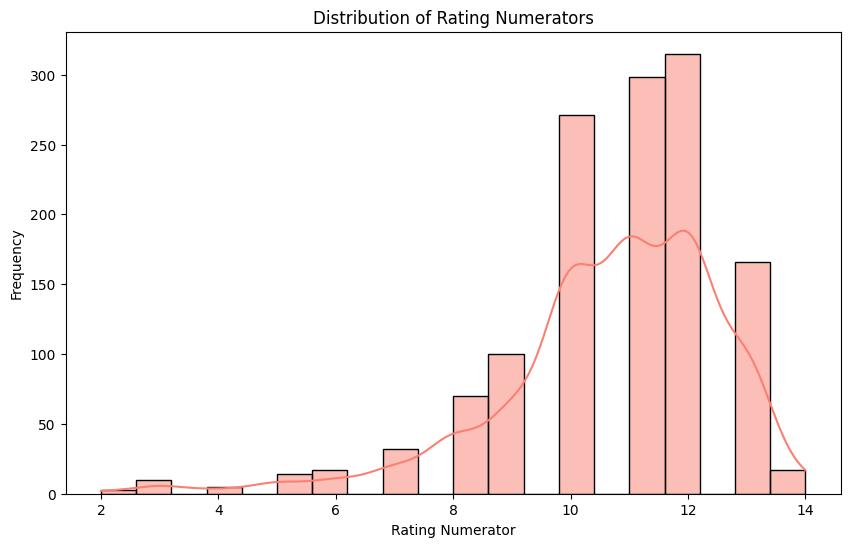

In [60]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(ta_copy_copy['rating_numerator'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Rating Numerators')
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.show()

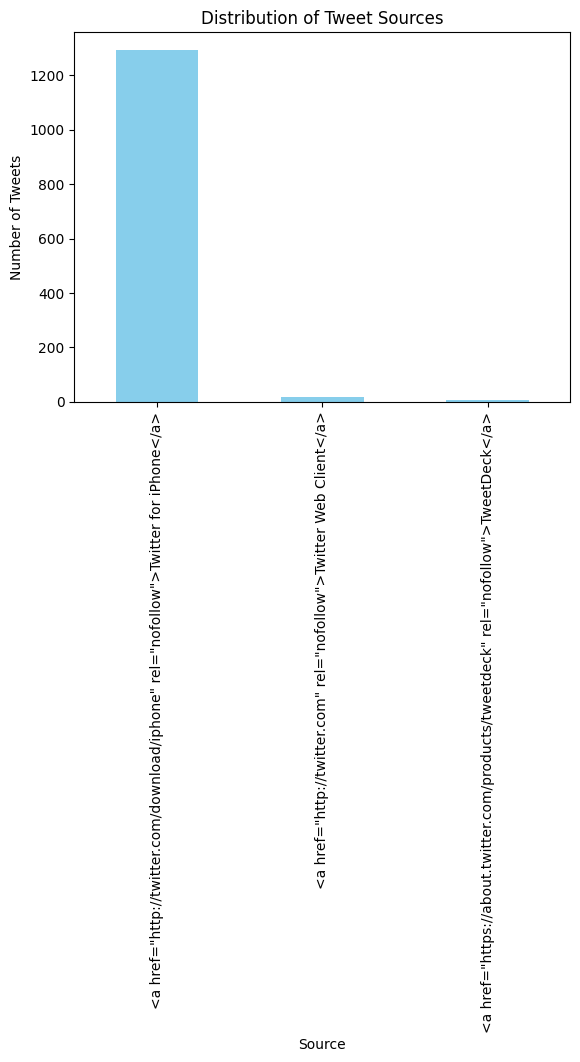

In [61]:
import matplotlib.pyplot as plt

source_counts = ta_copy_copy['source'].value_counts()

source_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Tweet Sources')
plt.xlabel('Source')
plt.ylabel('Number of Tweets')
plt.show()

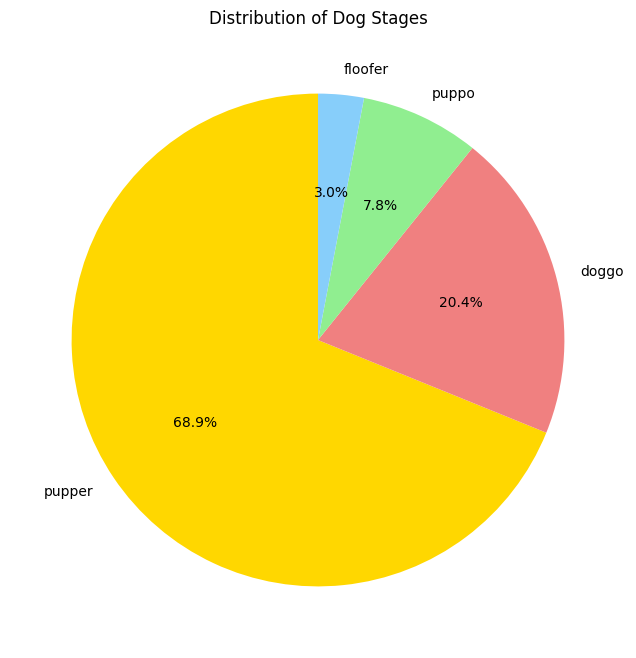

In [62]:
stage_counts = ta_copy_copy['stage'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(stage_counts, labels=stage_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Distribution of Dog Stages')
plt.show()